In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [2]:
import pandas as pd

df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
X = df.iloc[:,:-1]
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


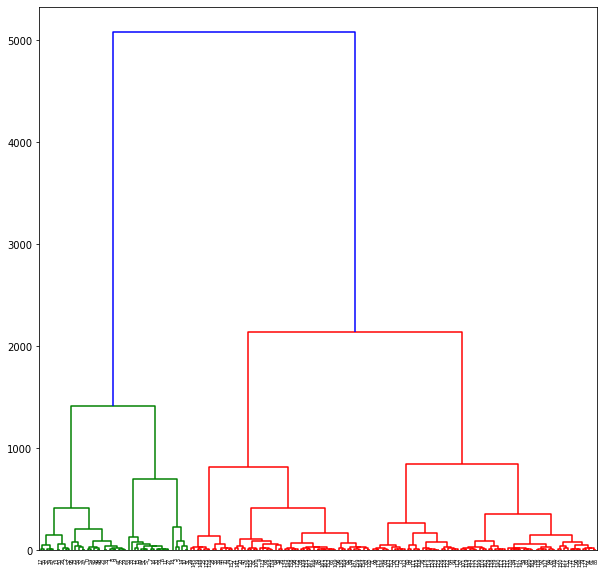

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [5]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([160.        , 165.        ,   2.61070872,   2.        ])

In [7]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

label = fcluster(Z, 10, criterion='distance')
np.unique(label)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121], dtype=int32)

In [8]:
label

array([ 97, 102, 109,  87,  28,  88, 112, 116, 102, 102,  89, 112, 119,
       108,  90, 118, 117,  92,  91,   4,  31,  29, 103, 101,   1,   5,
       111, 112,   7, 103, 113,  89, 104, 120,  94,   7,   8,  96, 101,
        23,  32, 103,  95,  18,   8, 100,  99, 104,  99, 115, 108, 114,
       110, 121,  98,  93, 105, 114, 113,  69,  18,  43,  85,  39,  53,
        18,  65,  65,  26,  33,  10,  38,  57, 106,   9,  41,  48,  62,
        24,  55,  36,  13,  84,  66,  67,  43,  64,  74,  19,  84,  58,
        44,  64,  37,  51, 107,  80,  40,  15,  38,  14,  74,  42,  39,
        19,  34,  65,  64,  34,  18,  72,  35,  81,  40,  46,  38,  64,
        52,  47,  74,  85,  60,  54,  46,  46,  46,  49,  56,  50,  71,
        77,  70,  73,  81,  16,  20,  12,  67,  71,  83,  82,  30,  67,
        75,   6,   2,  39,  86,  16,  76,  63,  61,  45,  18,  79,  12,
        59,  11,  17,  86,  66,  18,  72,  18,  86,  66,  22,  21,  25,
        78,  68,  57,  15,  27,  25,   3,   3,  73], dtype=int32

In [9]:
df['pred_scipy'] = label
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,pred_scipy
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,97
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,102
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,109
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,87
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,27
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,25
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3


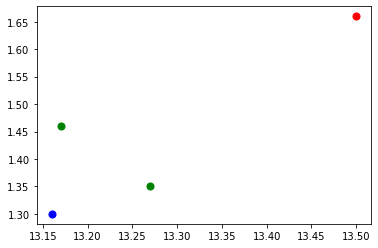

In [15]:
from matplotlib import pyplot as plt

plt.scatter(df.loc[label==1, 'Alcohol'], df.loc[label==1, 'Proanthocyanins'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Alcohol'], df.loc[label==2, 'Proanthocyanins'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Alcohol'], df.loc[label==3, 'Proanthocyanins'], s=50, marker='o', color='green')

plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [17]:
X['pred_sklearn'] = y_hc
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,pred_sklearn
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


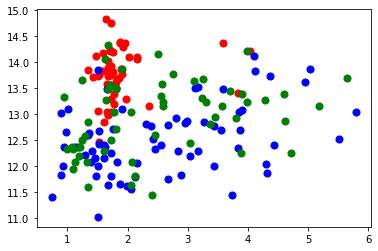

In [19]:
plt.scatter(X.loc[y_hc==0, 'Malic_Acid'], X.loc[y_hc==0, 'Alcohol'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Malic_Acid'], X.loc[y_hc==1, 'Alcohol'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Malic_Acid'], X.loc[y_hc==2, 'Alcohol'], s=50, marker='o', color='green')

plt.show()